# House Prediction #2
* Albert
* Jose
* Joshua

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ds_utils as ds
import seaborn as sns 

%matplotlib inline


## Functions

In [3]:
df = pd.read_csv("train.csv")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def dummy (data):
    #dataID = data["Id"]
    #data = data.drop(columns ='Id')
    data['Alley'] = data['Alley'].fillna('None')
    data ['BsmtQual']= data['BsmtQual'].fillna('None')
    data ['BsmtCond'] = data['BsmtCond'].fillna('None')
    data ['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
    data['GarageType'] = data['GarageType'].fillna('None')
    data['GarageQual'] = data['GarageQual'].fillna('None')
    data['GarageCond'] = data['GarageCond'].fillna('None')
    data['PoolQC'] = data['PoolQC'].fillna('None')
    data['Fence'] = data['Fence'].fillna('None')
    data['MiscFeature'] = data['MiscFeature'].fillna('None')
    for column in data:
        data[column].fillna(data[column].mode()[0], inplace = True)
    data = pd.get_dummies(data, columns = list(data.select_dtypes(include=['object'])))
    return data

def predummyremove(data):
   # print('Test')
    dataID = data["Id"]
    data = data.drop(columns = 'Id')
    data = data.drop(columns ='1stFlrSF')
    data = data.drop(columns = 'GarageYrBlt')
    data = data.drop(columns = 'GrLivArea')
    data = data.drop(columns = 'GarageArea')
    return data

def scat(x,y,title, xlabel, ylabel):
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def heat(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index

    #print(corrmat)
    plt.figure(figsize=(20,20))

    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    
def multiplescat(data, col):
    for col in data:
        scat(data[col], data[col], col +" v. SalePrice", col, "SalePrice")
        
def droprow(data,atb, value):
#     print('TEST')
    value = data[atb] >value
#     value = value.drop(value.index[1])
#     data = data.drop(data.index[1])
    k = -1
    for i in value:
        k = k+1
        if (i == True):
            value = value.drop(value.index[k])
            #print(data.iloc[k,4])
            data = data.drop(data.index[k])
            k = k -1
            #print(k)
    return data

def num (data): 
    return data.select_dtypes(include = ['float', 'int64']).copy()

floors_ = {
    20:"1",
    30:"1",
    40:"1",
    45:"1",
    50:"1",
    60:"2",
    70:"2",
    75:"2",
    80:"split",
    85:"split",
    90:"other",
    120:"1",
    150:"1",
    160:"2",
    180:"split",
    190:"other"
}

def traindatahandle (data):
    numeric_df = data.select_dtypes(include = ['float', 'int64']).copy()
    numeric_df["buildType"] =  numeric_df["MSSubClass"].map(floors_)
    numeric_df = pd.get_dummies(numeric_df)
    numeric_df = numeric_df.drop(columns=["MSSubClass"])
    numeric_df["OverallQC"] = (numeric_df["OverallQual"]+numeric_df["OverallCond"])/2
    numeric_df = numeric_df.drop(columns=["OverallQual","OverallCond"])
    year_remod = np.array(numeric_df["YearRemodAdd"])
    year_remod.shape
    yr_built = np.array(numeric_df["YearBuilt"])
    yr_built.shape
    numeric_df["remod"] = [0 if year_remod[i] ==yr_built[i] else 1 for i in range(len(year_remod))]
    numeric_df["old"] = [1 if numeric_df["YearBuilt"][i] > 1946 else 0 for i in range(len(yr_built))]
    numeric_df["old"].value_counts()
    numeric_df["yrsOld"] = 2010-numeric_df["YearBuilt"]
    numeric_df = numeric_df.drop(columns=["YearBuilt"])
    numeric_df["SuperPorch"]= numeric_df["OpenPorchSF"]+ numeric_df["EnclosedPorch"]+ numeric_df["3SsnPorch"] + numeric_df["ScreenPorch"]
    numeric_df["BsmtBath"] = numeric_df["BsmtFullBath"]+numeric_df["BsmtHalfBath"]
    numeric_df["Bath"] = numeric_df["FullBath"]+numeric_df["HalfBath"]
    numeric_df = numeric_df.drop(columns=["LotFrontage","BsmtBath","HalfBath","FullBath","BsmtHalfBath","BsmtFullBath","YearRemodAdd","Id","OpenPorchSF","ScreenPorch","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "BedroomAbvGr", "GarageYrBlt", "MoSold", "YrSold","GarageArea"])
    return numeric_df
    

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
ds.get_nan_col_proportions(df)

[('LotFrontage', 0.177),
 ('Alley', 0.938),
 ('MasVnrType', 0.005),
 ('MasVnrArea', 0.005),
 ('BsmtQual', 0.025),
 ('BsmtCond', 0.025),
 ('BsmtExposure', 0.026),
 ('BsmtFinType1', 0.025),
 ('BsmtFinType2', 0.026),
 ('Electrical', 0.001),
 ('FireplaceQu', 0.473),
 ('GarageType', 0.055),
 ('GarageYrBlt', 0.055),
 ('GarageFinish', 0.055),
 ('GarageQual', 0.055),
 ('GarageCond', 0.055),
 ('PoolQC', 0.995),
 ('Fence', 0.808),
 ('MiscFeature', 0.963)]

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# numeric_df gave us a list of all the numeric based results

In [8]:
numeric_df = df.select_dtypes(include=['float64','int64']).copy()

In [9]:
numeric_df.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [10]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
#  OVERALLQUAL & OVERALLCond;   half weighted, or check whats better correlated with sale price, or something
# YEAR BUILT;    into >1946 and <1945 
# IF YearRemodAdd == year built then no remod, then prob assign 1 - hot
# drop: MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, LowQualFinSF, BedroomAbvGr, GarageYrBlt, MoSold, YrSold, 


In [12]:
numeric_df["MSSubClass"].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [13]:
sum(numeric_df["MSSubClass"].value_counts()[:3])/sum(numeric_df["MSSubClass"].value_counts())

0.6705479452054794

# Feature Engineering
## MSSubClass: Identifies the type of dwelling involved in the sale.	

        #20	1-STORY 1946 & NEWER ALL STYLES
        #30	1-STORY 1945 & OLDER
        #40	1-STORY W/FINISHED ATTIC ALL AGES
        #45	1-1/2 STORY - UNFINISHED ALL AGES
        #50	1-1/2 STORY FINISHED ALL AGES
        #60	2-STORY 1946 & NEWER
        #70	2-STORY 1945 & OLDER
        #75	2-1/2 STORY ALL AGES
        #80	SPLIT OR MULTI-LEVEL
        #85	SPLIT FOYER
        #90	DUPLEX - ALL STYLES AND AGES
       ##120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       #150	1-1/2 STORY PUD - ALL AGES
       #160	2-STORY PUD - 1946 & NEWER
       #180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       #190	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [14]:
floors_ = {
    20:"1",
    30:"1",
    40:"1",
    45:"1",
    50:"1",
    60:"2",
    70:"2",
    75:"2",
    80:"split",
    85:"split",
    90:"other",
    120:"1",
    150:"1",
    160:"2",
    180:"split",
    190:"other"
}

In [15]:
numeric_df["buildType"] = numeric_df["MSSubClass"].map(floors_)

In [16]:
numeric_df = pd.get_dummies(numeric_df)

In [17]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'buildType_1',
       'buildType_2', 'buildType_other', 'buildType_split'],
      dtype='object')

## Droped Some Columns 
* MSSubClass OverallQuall and Overall COnd
## Created Overall QC

In [18]:
numeric_df = numeric_df.drop(columns=["MSSubClass"])

In [19]:
numeric_df["OverallQC"] = (numeric_df["OverallQual"]+numeric_df["OverallCond"])/2

In [20]:
numeric_df = numeric_df.drop(columns=["OverallQual","OverallCond"])

In [21]:
year_remod = np.array(numeric_df["YearRemodAdd"])
year_remod.shape

(1460,)

In [22]:
yr_built = np.array(numeric_df["YearBuilt"])
yr_built.shape

(1460,)

In [23]:
numeric_df["remod"] = [0 if year_remod[i] ==yr_built[i] else 1 for i in range(len(year_remod))]

In [24]:
numeric_df["old"] = [1 if numeric_df["YearBuilt"][i] > 1946 else 0 for i in range(len(yr_built))]

In [25]:
numeric_df["old"].value_counts()

1    1173
0     287
Name: old, dtype: int64

In [26]:
numeric_df["yrsOld"] = 2010-numeric_df["YearBuilt"]
#could prob even bin them, since i dont think y/y change will be that sig

In [27]:
numeric_df = numeric_df.drop(columns=["YearBuilt"])

In [28]:
numeric_df["SuperPorch"]= numeric_df["OpenPorchSF"]+ numeric_df["EnclosedPorch"]+ numeric_df["3SsnPorch"] + numeric_df["ScreenPorch"]

In [29]:
numeric_df["BsmtBath"] = numeric_df["BsmtFullBath"]+numeric_df["BsmtHalfBath"]
numeric_df["Bath"] = numeric_df["FullBath"]+numeric_df["HalfBath"]

In [30]:
numeric_df = numeric_df.drop(columns=["LotFrontage","BsmtBath","HalfBath","FullBath","BsmtHalfBath","BsmtFullBath","YearRemodAdd","Id","OpenPorchSF","ScreenPorch","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "BedroomAbvGr", "GarageYrBlt", "MoSold", "YrSold","GarageArea"])


In [49]:
# numeric_df = numeric_df.drop(columns=["1stFlrSF"])

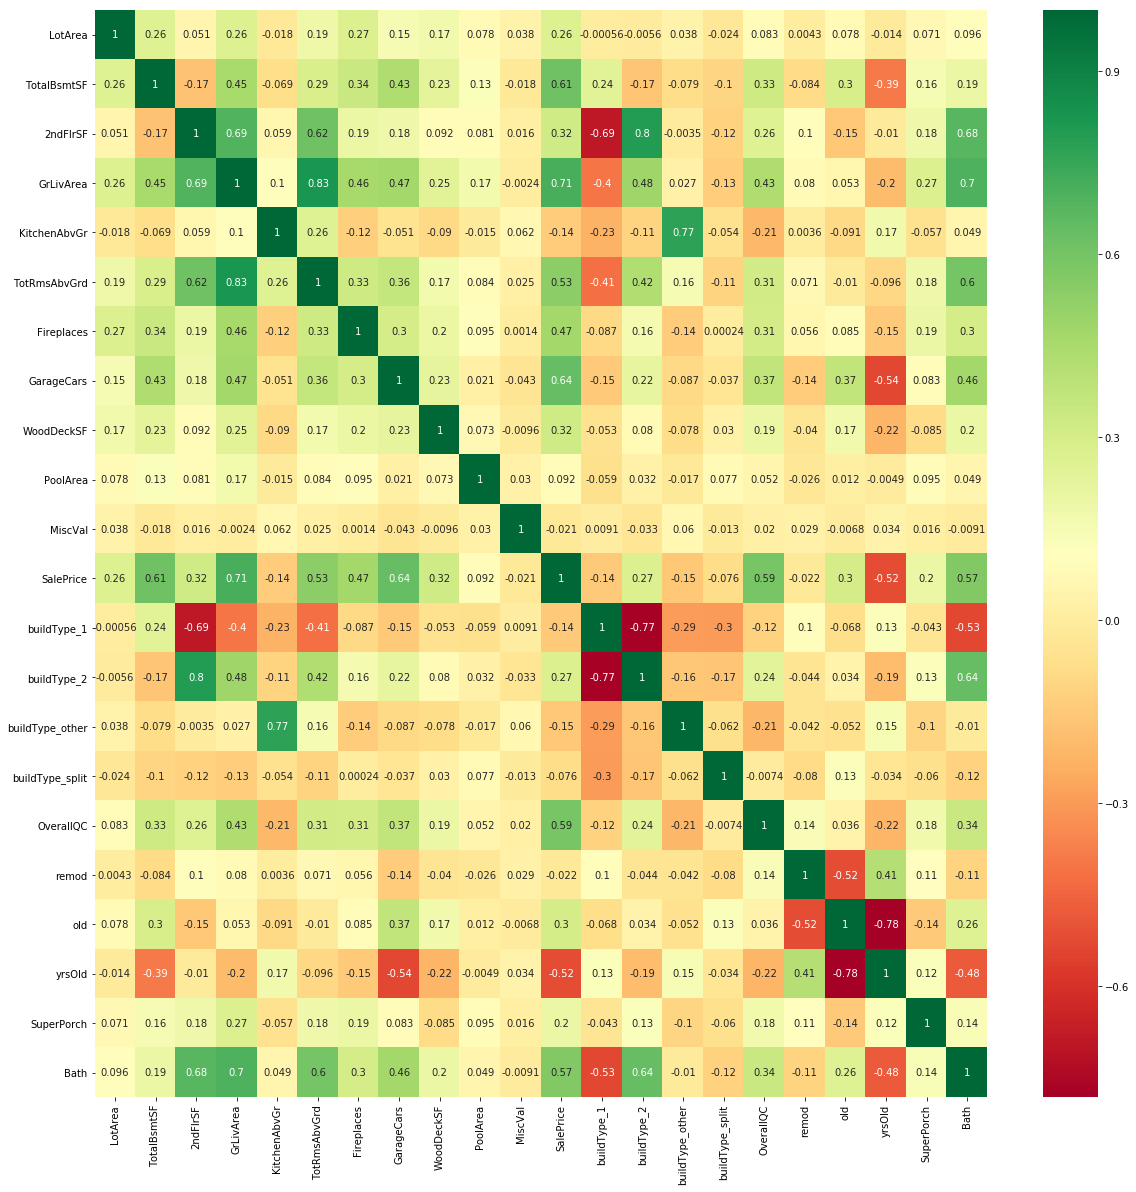

In [50]:
heat(numeric_df)


In [51]:
numeric_df.head()

,LotArea,TotalBsmtSF,2ndFlrSF,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,PoolArea,...,buildType_1,buildType_2,buildType_other,buildType_split,OverallQC,remod,old,yrsOld,SuperPorch,Bath
0,8450,856,854,1710,1,8,0,2,0,0,...,0,1,0,0,6.0,0,1,7,61,3
1,9600,1262,0,1262,1,6,1,2,298,0,...,1,0,0,0,7.0,0,1,34,0,2
2,11250,920,866,1786,1,6,1,2,0,0,...,0,1,0,0,6.0,1,1,9,42,3
3,9550,756,756,1717,1,7,1,3,0,0,...,0,1,0,0,6.0,1,0,95,307,1
4,14260,1145,1053,2198,1,9,1,3,192,0,...,0,1,0,0,6.5,0,1,10,84,3


In [52]:
#multi

In [53]:
numeric_df.dtypes

LotArea              int64
TotalBsmtSF          int64
2ndFlrSF             int64
GrLivArea            int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
WoodDeckSF           int64
PoolArea             int64
MiscVal              int64
SalePrice            int64
buildType_1          uint8
buildType_2          uint8
buildType_other      uint8
buildType_split      uint8
OverallQC          float64
remod                int64
old                  int64
yrsOld               int64
SuperPorch           int64
Bath                 int64
dtype: object

In [54]:
Y= np.array(numeric_df["SalePrice"])
X =numeric_df.drop(columns=["SalePrice"])

In [55]:
print(X.shape,Y.shape)

(1460, 21) (1460,)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
nruns=200
errors=[]
for i in range(nruns):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.20)
    r=DecisionTreeRegressor()
    r.fit(xtrain,ytrain)
    YP=r.predict(xtest)
    errors.append(mean_squared_error(YP,ytest))
print(np.mean(errors),np.std(errors))

1951554662.4250855 490380133.81852204


In [57]:
df2 = pd.read_csv("test.csv")

In [58]:
XY = traindatahandle(df2)

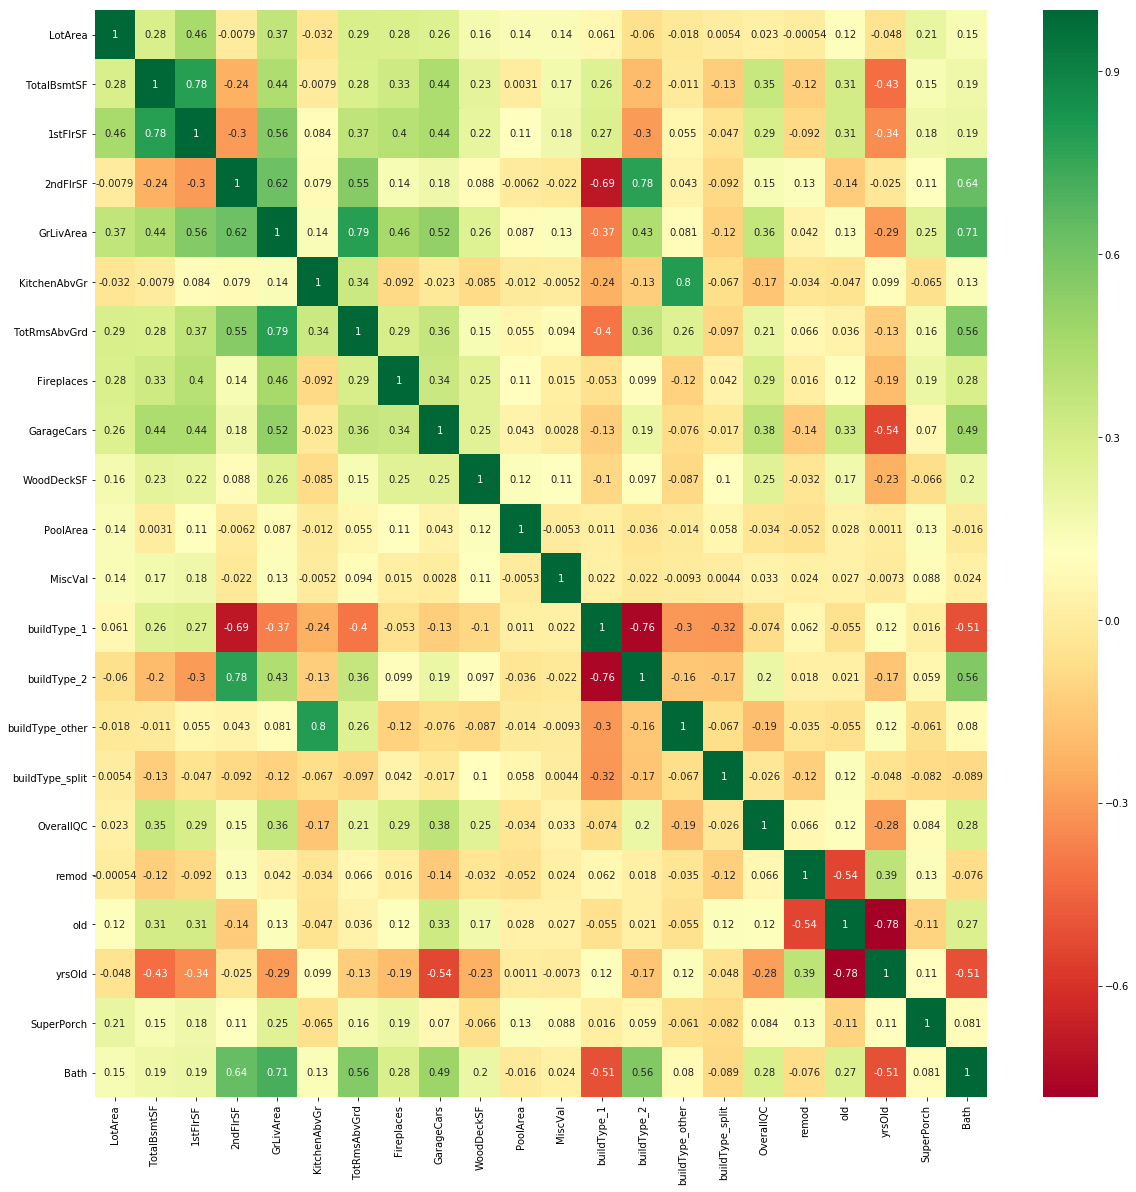

In [59]:
heat(XY)


In [60]:
print(XY.shape)

(1459, 22)


In [61]:
XY

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,...,buildType_1,buildType_2,buildType_other,buildType_split,OverallQC,remod,old,yrsOld,SuperPorch,Bath
0,11622,882.0,896,0,896,1,5,0,1.0,140,...,1,0,0,0,5.5,0,1,49,120,1
1,14267,1329.0,1329,0,1329,1,6,0,1.0,393,...,1,0,0,0,6.0,0,1,52,36,2
2,13830,928.0,928,701,1629,1,6,1,2.0,212,...,0,1,0,0,5.0,1,1,13,34,3
3,9978,926.0,926,678,1604,1,7,1,2.0,360,...,0,1,0,0,6.0,0,1,12,36,3
4,5005,1280.0,1280,0,1280,1,5,0,2.0,0,...,1,0,0,0,6.5,0,1,18,226,2
5,10000,763.0,763,892,1655,1,7,1,2.0,157,...,0,1,0,0,5.5,1,1,17,84,3
6,7980,1168.0,1187,0,1187,1,6,0,2.0,483,...,1,0,0,0,6.5,1,1,18,21,2
7,8402,789.0,789,676,1465,1,7,1,2.0,0,...,0,1,0,0,5.5,0,1,12,75,3
8,10176,1300.0,1341,0,1341,1,5,1,2.0,192,...,1,0,0,0,6.0,0,1,20,0,2
9,8400,882.0,882,0,882,1,4,0,2.0,240,...,1,0,0,0,4.5,0,1,40,0,1


In [62]:
XY['GarageCars'] = XY['GarageCars'].fillna(XY['GarageCars'].mean())



In [63]:
XY['TotalBsmtSF'] = XY['TotalBsmtSF'].fillna(XY['TotalBsmtSF'].mean())



In [64]:
ans =r.predict(XY)

ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 22 

In [ ]:
kaggle = pd.DataFrame(df2["Id"])

In [ ]:
kaggle["SalePrice"] =ans

In [ ]:
kaggle